In [1]:
import pandas as pd
import jieba
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 繪圖設定

In [2]:
# 設定圖的字體大小
plt.rcParams['font.size'] = 14

# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# 設定文字雲中文字體路徑
FontPath = 'SourceHanSansTW-Regular.otf' # 設定字型

# <font color = #ffa>從這裡開始</font>

<font color=#ffa>資料集：PTT日旅版  
關鍵字：住宿、酒店、飯店、民宿  
文章期間： 2022/1/1 ~ 2024/3/15</font>

In [3]:
df = pd.read_csv('日旅資料.csv')
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Japan_Travel/M.16411981...,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,iPhone777,Japan_Travel,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""skyangle0607...",14.8.132.225,2022-01-04 00:58:26,ptt
1,2,https://www.ptt.cc/bbs/Japan_Travel/M.16444013...,[遊記]北海道8天7夜自駕遊(厚岸、星野等)下,2022-02-09 18:08:29,colon1114,Japan_Travel,時間：2019年6月\n\n主要城市：旭川、美瑛、北見、阿寒、釧路、帶廣、占冠村、札幌\n\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""wingthink"", ...",220.136.110.47,2022-02-10 00:55:40,ptt
2,3,https://www.ptt.cc/bbs/Japan_Travel/M.16444647...,[住宿]星野磐梯山溫泉飯店，體驗時髦的大人感,2022-02-10 11:45:17,fussy,Japan_Travel,造訪日期：2019.03\n\n圖文版網誌\nhttps://natasha-travele...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""kgcem"", ""cmt...",61.216.83.164,2022-02-11 00:56:00,ptt
3,4,https://www.ptt.cc/bbs/Japan_Travel/M.16445446...,[遊記]2021紅葉季的宇佐神宮，吃鱉火鍋料理,2022-02-11 09:57:04,peikie,Japan_Travel,造訪日期：2021年11月\n\n圖文網誌版：\nhttps://peikie1.pixne...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mizuhara"", ""...",126.25.206.60,2022-02-12 00:56:46,ptt
4,5,https://www.ptt.cc/bbs/Japan_Travel/M.16445451...,[遊記]大分縣豐後高田解憂雜貨店場景，住宿農泊,2022-02-11 10:06:18,peikie,Japan_Travel,造訪日期：2021年12月初\n\n圖文網誌版：\nhttps://peikie1.pixn...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""lili999900"",...",126.25.206.60,2022-02-12 00:56:46,ptt
...,...,...,...,...,...,...,...,...,...,...,...
853,854,https://www.ptt.cc/bbs/Japan_Travel/M.17100632...,[遊記]對啊～是三重沒錯,2024-03-10 17:34:54,lydiawei,Japan_Travel,前言：\n出發前被問要去哪裡玩，不是露出困惑的臉，就是跟我說過橋就到了，僅有少少的人聽到\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""zombierosa"",...",150.117.158.38,2024-03-11 02:11:23,ptt
854,855,https://www.ptt.cc/bbs/Japan_Travel/M.17100716...,[住宿]鹿兒島太陽皇家酒店可遠眺櫻島火山房型,2024-03-10 19:54:54,lumike0602,Japan_Travel,鹿兒島太陽皇家酒店Kagoshima Sun Royal Hotel\n地址:鹿児島県鹿児島...,[],125.228.145.90,2024-03-11 02:11:23,ptt
855,856,https://www.ptt.cc/bbs/Japan_Travel/M.17101146...,[遊記]202401大阪名古屋7日遊,2024-03-11 07:49:59,yoyigh,Japan_Travel,造訪日期：2024.01.10-01.16\n\n1/10\n搭乘 樂桃MM028 (桃園-...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""fang37564"", ...",111.83.76.50,2024-03-13 02:06:25,ptt
856,857,https://www.ptt.cc/bbs/Japan_Travel/M.17101481...,[遊記]熊本/黑川/湯布院/阿蘇6日,2024-03-11 17:09:31,terryaxl,Japan_Travel,造訪日期：2024.2.18~2024.2.23\n\n\n2/18\n搭乘華航CI194到...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""chipndalepp""...",111.251.240.217,2024-03-13 02:06:25,ptt


### 資料初步清理
- 清除內文為空值的文章

- 透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號。

- 清除不重要的字如換行、網址

In [4]:
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artUrl', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

,artTitle,artDate,artContent,sentence
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,新年快樂!!!。，造訪日期：2121.11。從上回寫完佐渡懶人包之後可能精疲力竭，超久都沒碰...
1,[遊記]北海道8天7夜自駕遊(厚岸、星野等)下,2022-02-09 18:08:29,時間：2019年6月\n\n主要城市：旭川、美瑛、北見、阿寒、釧路、帶廣、占冠村、札幌\n\...,時間：2019年6月。主要城市：旭川、美瑛、北見、阿寒、釧路、帶廣、占冠村、札幌。，前情提要...
2,[住宿]星野磐梯山溫泉飯店，體驗時髦的大人感,2022-02-10 11:45:17,造訪日期：2019.03\n\n圖文版網誌\nhttps://natasha-travele...,造訪日期：2019.03。圖文版網誌， in/out很便利。踏出飯店就能看到壯麗的磐梯山!，...
3,[遊記]2021紅葉季的宇佐神宮，吃鱉火鍋料理,2022-02-11 09:57:04,造訪日期：2021年11月\n\n圖文網誌版：\nhttps://peikie1.pixne...,造訪日期：2021年11月。圖文網誌版：，
4,[遊記]大分縣豐後高田解憂雜貨店場景，住宿農泊,2022-02-11 10:06:18,造訪日期：2021年12月初\n\n圖文網誌版：\nhttps://peikie1.pixn...,造訪日期：2021年12月初。圖文網誌版：， ロマン蔵（昭和的小鎮、昭和浪漫倉庫），・響（當...
5,Fw:[心得]日本東京銀座廣場飯店,2022-02-15 11:34:06,作者: faigo3ppp (Dr. Lai) 看板: Hotel\n標題: [心得] 日本...,作者: faigo3ppp (Dr. Lai) 看板: Hotel，標題: [心得] 日本 ...
6,Fw:[心得]日本北海道函館喜來登住宿含早餐,2022-02-19 14:08:41,作者: faigo3ppp (Dr. Lai) 看板: Hotel\n標題: [心得] 日本...,作者: faigo3ppp (Dr. Lai) 看板: Hotel，標題: [心得] 日本 ...
7,[遊記]神戶有馬溫泉,2022-02-22 16:46:58,造訪日期：2017.01\n本文改寫自個人圖文網誌：\nhttps://h010121.pi...,造訪日期：2017.01，本文改寫自個人圖文網誌：， park玩了一天後，來到六甲山頂，的纜...
8,[冬雪]上越 灯の廻廊,2022-03-03 20:34:58,1. 旅行時間：2022年2月26日\n \n2. 旅行地點： 新潟縣上越市\n \n3. ...,1. 旅行時間：2022年2月26日， ，2. 旅行地點： 新潟縣上越市， ，3. 圖文摘要...
9,Fw:[心得]日本北海道新雪谷(二世谷)希爾頓酒店,2022-03-26 11:28:34,作者: faigo3ppp (Dr. Lai) 看板: Hotel\n標題: [心得] 日本...,作者: faigo3ppp (Dr. Lai) 看板: Hotel，標題: [心得] 日本 ...


### 斷句

In [5]:
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)

sent_df.head(10)

,artTitle,artDate,artContent,sentence
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,新年快樂
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,造訪日期：2121.11
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,從上回寫完佐渡懶人包之後可能精疲力竭
3,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,超久都沒碰blog
4,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,但想說為了維持乾淨版面 每年年費還是有在繳...加減也要output一下 XD
5,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,2022年也請大大多多指教 Orz Orz Orz
6,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,hotel
7,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,本身定位為高級飯店
8,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,但整體又布置得像在開趴
9,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,在七彩霓虹燈下還可以享受高級fu


### 斷詞

In [6]:
# 初始化斷詞引擎

jieba.set_dictionary('dict.txt')

In [7]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df.head(10)

,artTitle,artDate,artContent,sentence
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,新年快樂
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,造訪日期212111
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,從上回寫完佐渡懶人包之後可能精疲力竭
3,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,超久都沒碰blog
4,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,但想說為了維持乾淨版面 每年年費還是有在繳加減也要output一下 XD
5,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,2022年也請大大多多指教 Orz Orz Orz
6,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,hotel
7,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,本身定位為高級飯店
8,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,但整體又布置得像在開趴
9,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,在七彩霓虹燈下還可以享受高級fu


In [8]:
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df.head(10)

Building prefix dict from c:\Users\a8184\OneDrive\桌面\社群媒體段落\dict.txt ...
Loading model from cache C:\Users\a8184\AppData\Local\Temp\jieba.ue953f4268381ccefd0b427f5eff800df.cache
Loading model cost 0.429 seconds.
Prefix dict has been built successfully.


,artTitle,artDate,artContent,word
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,新年
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,快樂
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,造訪
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,日期
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,212111
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,寫完
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,佐渡
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,懶人包
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,之後
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,可能


### 計算去除停用字及更新字典前的詞頻

In [9]:
freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df.head(10)

C:\Users\a8184\AppData\Local\Temp\ipykernel_16992\36027799.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


,word,count
0,可以,2230
1,飯店,2199
2,我們,1372
3,住宿,1073
4,時間,1010
5,日本,986
6,沒有,927
7,早餐,875
8,就是,850
9,房間,828


### 視覺化結果(移除停用字前)

詞頻前10的長條圖

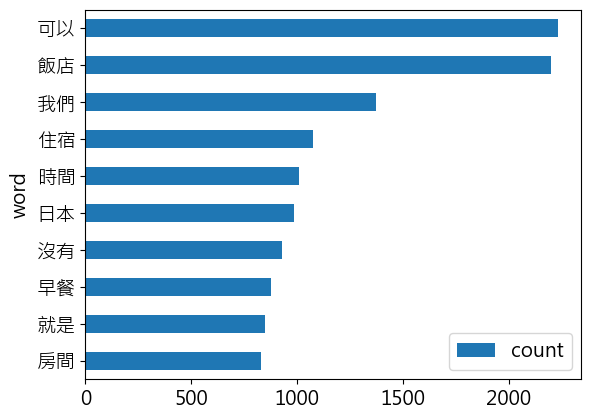

In [10]:
freq_df.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.show()

繪製文字雲

In [11]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

freq_dict

{'可以': 2230,
 '飯店': 2199,
 '我們': 1372,
 '住宿': 1073,
 '時間': 1010,
 '日本': 986,
 '沒有': 927,
 '早餐': 875,
 '就是': 850,
 '房間': 828,
 '因為': 797,
 '溫泉': 781,
 '行程': 776,
 '還有': 769,
 '真的': 746,
 '所以': 709,
 '看到': 648,
 '東京': 638,
 '一個': 619,
 '比較': 617,
 '入住': 609,
 '機場': 593,
 '車站': 592,
 '非常': 580,
 '覺得': 533,
 '一下': 531,
 '這次': 516,
 '使用': 503,
 '日期': 503,
 '空間': 500,
 '還是': 500,
 '不過': 483,
 '如果': 474,
 '分鐘': 464,
 '最後': 458,
 '提供': 446,
 '造訪': 441,
 '選擇': 439,
 '前往': 431,
 '直接': 429,
 '旅館': 429,
 '晚上': 427,
 '行李': 419,
 '附近': 417,
 '不錯': 405,
 '自己': 404,
 '大家': 398,
 '很多': 395,
 '雖然': 395,
 '餐廳': 393,
 '這裡': 390,
 '第一': 379,
 '京都': 374,
 '方便': 372,
 '巴士': 362,
 'JR': 361,
 '景點': 359,
 '神社': 353,
 '晚餐': 349,
 '好吃': 347,
 '有點': 338,
 '喜歡': 338,
 '感覺': 329,
 'XD': 327,
 '大阪': 323,
 '推薦': 319,
 '應該': 313,
 'Hotel': 310,
 '已經': 309,
 '免費': 302,
 '地方': 302,
 '大概': 297,
 '需要': 295,
 '這個': 294,
 '抵達': 294,
 '但是': 293,
 '交通': 293,
 '之後': 289,
 '而且': 288,
 '出發': 284,
 '公園': 284,
 '時候': 283,
 '開始': 2

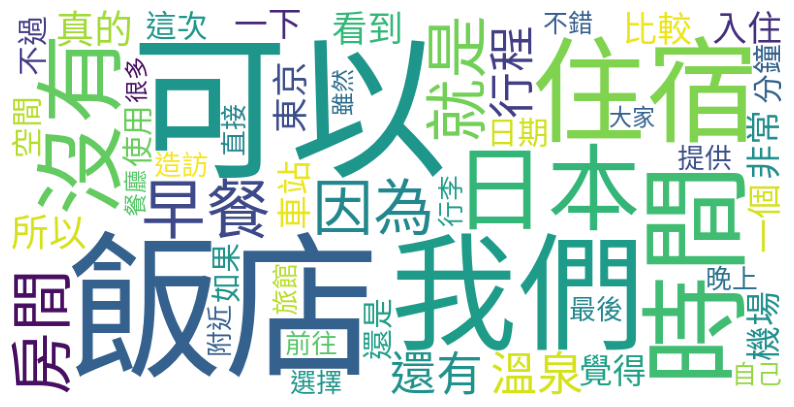

In [12]:
# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 移除停用字 <font color=#ffa>(還沒手動更新)</font>

In [13]:
stopwords = [line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()] 
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df.head(10)

,artTitle,artDate,artContent,word
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,新年
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,快樂
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,造訪
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,日期
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,212111
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,寫完
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,佐渡
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,懶人包
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,之後
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,精疲力竭


### 計算移除停用字後的詞頻

再次繪製長條圖 (移除停用字後)  
<font color=#ffa>還是有不相關的詞（ex.看到）</font>

C:\Users\a8184\AppData\Local\Temp\ipykernel_16992\583685406.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


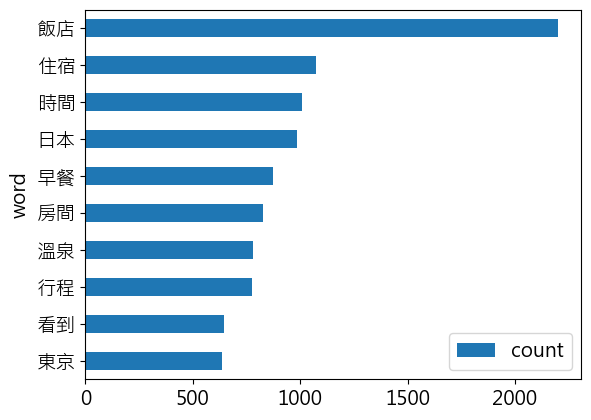

In [14]:
freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()

freq_df_nostop.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.show()

再次繪製文字雲(移除停用字後)  
<font color=#ffa>文字雲中看得到很多不相關的詞，下步驟自訂停用字來手動清理  
ex. '前往', 'XD', '之後', '直接'...等等</font>

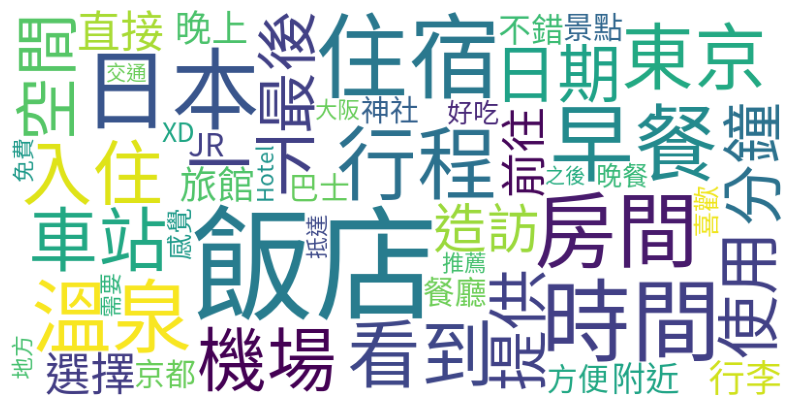

In [15]:
freq_dict_nostop = freq_df_nostop.set_index('word').to_dict()
freq_dict_nostop = freq_dict_nostop['count']

# 繪製文字雲
wordcloud_nostop = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_nostop.generate_from_frequencies(freq_dict_nostop)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop)
plt.axis('off')
plt.show()

### 更新停用字字典  
<font color=#ffa>以下為自訂停用字詞</font>

In [16]:
# 參數形式手動加入停用字
stopwords_manual = ["in","XD", "一下", "一位", "一個", "一直", "一點", "下午", "不用", "主要", "之後", "今天", "今年", "今日", "他們", "以下", "以後", "使用", "來到", "入住", "內容", "出發", "分享", "前往", "包含", "包括", "可能", "吃到", "各位", "名稱", "回到", "因一", "因上", "地方", "好像", "完整", "就是", "層面", "左右", "年前", "年增", "建議", "感覺", "成為", "我們", "打打", "抵達", "持續", "指出", "提供", "搭配", "整個", "方面", "旁邊", "日期", "早上", "明天", "明年", "明日", "昨日", "是否", "晚上", "最後", "月底", "有", "有沒有", "有無", "東西", "決定", "沒", "沒有", "準備", "然後", "特別", "現在", "發現", "發生", "目前", "直接", "相關", "看到", "看看", "知道", "碰到", "維持", "聞到", "聽到", "表示", "裡面", "認為", "謝謝", "這", "這裡", "這間", "造成", "造訪", "進行", "過去", "那裡", "附近", "隔天", "離開", "需要", "顯示"]
stopwords.extend(stopwords_manual)

In [17]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2.head(10)

,artTitle,artDate,artContent,word
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,新年
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,快樂
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,212111
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,寫完
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,佐渡
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,懶人包
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,精疲力竭
3,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,超久
3,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,blog
4,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,乾淨


### <font color=#ffa>更新斷詞字典</font>

In [18]:
jieba.add_word('不要錯過',freq= 100)
jieba.add_word('不能錯過',freq= 100)

### 重新斷詞

In [19]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]
word_df_updated

,artTitle,artDate,artContent,word
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,新年
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,快樂
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,造訪
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,日期
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,212111
...,...,...,...,...
58462,[遊記]三月_五日遊_岡山進關西出,2024-03-12 16:01:40,造訪日期: 2024年3月\n\n先下結語：第一次去日本東京是朋友一起，這次是單人背包客獨旅...,願意
58462,[遊記]三月_五日遊_岡山進關西出,2024-03-12 16:01:40,造訪日期: 2024年3月\n\n先下結語：第一次去日本東京是朋友一起，這次是單人背包客獨旅...,持續
58462,[遊記]三月_五日遊_岡山進關西出,2024-03-12 16:01:40,造訪日期: 2024年3月\n\n先下結語：第一次去日本東京是朋友一起，這次是單人背包客獨旅...,東橫
58463,[遊記]三月_五日遊_岡山進關西出,2024-03-12 16:01:40,造訪日期: 2024年3月\n\n先下結語：第一次去日本東京是朋友一起，這次是單人背包客獨旅...,謝謝


### 重新移除停用字

In [20]:
nostop_df_updated = word_df_updated[~word_df_updated['word'].isin(stopwords)]

nostop_df_updated

,artTitle,artDate,artContent,word
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,新年
0,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,快樂
1,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,212111
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,寫完
2,[住宿]關西W大阪(WHotel,2022-01-03 16:21:57,新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...,佐渡
...,...,...,...,...
58462,[遊記]三月_五日遊_岡山進關西出,2024-03-12 16:01:40,造訪日期: 2024年3月\n\n先下結語：第一次去日本東京是朋友一起，這次是單人背包客獨旅...,60006300
58462,[遊記]三月_五日遊_岡山進關西出,2024-03-12 16:01:40,造訪日期: 2024年3月\n\n先下結語：第一次去日本東京是朋友一起，這次是單人背包客獨旅...,日圓
58462,[遊記]三月_五日遊_岡山進關西出,2024-03-12 16:01:40,造訪日期: 2024年3月\n\n先下結語：第一次去日本東京是朋友一起，這次是單人背包客獨旅...,願意
58462,[遊記]三月_五日遊_岡山進關西出,2024-03-12 16:01:40,造訪日期: 2024年3月\n\n先下結語：第一次去日本東京是朋友一起，這次是單人背包客獨旅...,東橫


### <font color=#ffa>查看'不能錯過'出現幾次</font>

In [21]:
nostop_df_updated[nostop_df_updated['word'] == ('不能錯過')]['word'].count()

7

### 重新計算詞頻(移除停用字、移除自訂停用字、自訂重新斷詞)

In [22]:
freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).sort_values(by = ['count'], ascending = False).reset_index()

freq_df_updated

C:\Users\a8184\AppData\Local\Temp\ipykernel_16992\4165249668.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).sort_values(by = ['count'], ascending = False).reset_index()


,word,count
0,飯店,2199
1,住宿,1073
2,時間,1010
3,日本,986
4,早餐,875
...,...,...
33042,Mocktail,1
33043,那台,1
33044,邁出,1
33045,穩健,1


### 重新繪製長條圖(移除停用字、移除自訂停用字、自訂重新斷詞)  
<font color=#ffa>相較初次過濾停用字的結果， '看到' 被手動過濾, 替補成關聯性較高的 '機場'</font>

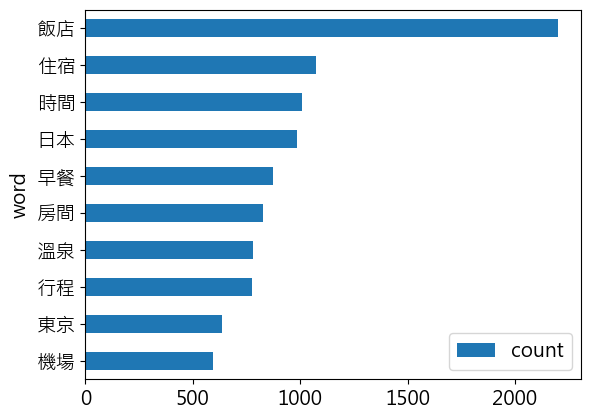

In [23]:
freq_df_updated.head(10).plot.barh(x='word', y='count').invert_yaxis()
plt.show()

### 重新繪製文字雲(移除停用字、移除自訂停用字、自訂重新斷詞)

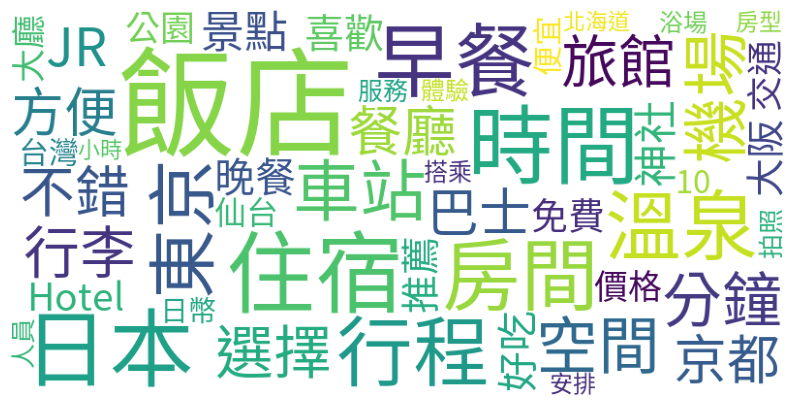

In [24]:
freq_dict_updated = freq_df_updated.set_index('word').to_dict()
freq_dict_updated = freq_dict_updated['count']

# 繪製文字雲
wordcloud_after = WordCloud(background_color='white', width=800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_after.generate_from_frequencies(freq_dict_updated)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_after)
plt.axis('off')
plt.show()

### 比較前後文字雲  
<font color=#ffa>max_words都是50，明顯右邊的文字雲乾淨許多  
可以從文字雲就推論出重點和相關詞</font>

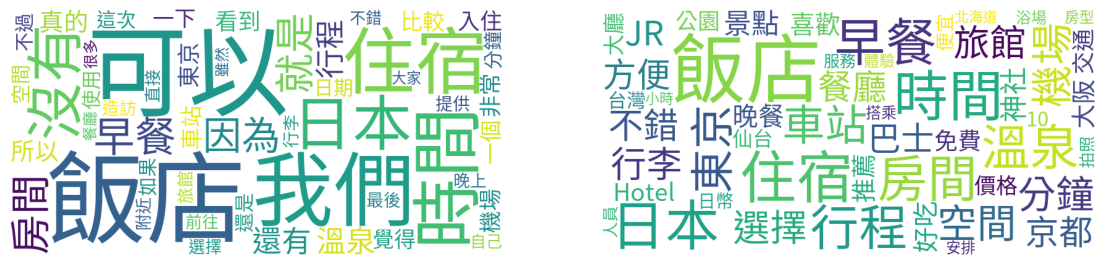

In [25]:
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_after)
plt.axis('off')

plt.show()